<a href="https://colab.research.google.com/github/kemaladamr/ML_with_sklearn/blob/main/PreparingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# missing values
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.DataFrame(
    {
        'gender': np.random.binomial(1, .6, 100),
        'height': np.random.normal(0, 10, 100),
        'noise' : np.random.normal(0, 2, 100)
    }
)

df['height'] = df['height'] + df['gender'].apply(
    lambda g: 150 if g else 180
)
df['height (with 75% NaN)'] = df['height'].apply(
    lambda x: x if np.random.binomial(1, .25, 1)[0] else np.nan
)
df['weight'] = df['height'] + df['noise'] - 110

In [3]:
df.isnull().mean()

gender                   0.00
height                   0.00
noise                    0.00
height (with 75% NaN)    0.71
weight                   0.00
dtype: float64

In [4]:
df.head()

,gender,height,noise,height (with 75% NaN),weight
0,0,184.873122,-0.653502,184.873122,74.219620
1,1,152.024815,-1.204518,NaN,40.820297
2,0,186.752654,1.308513,NaN,78.061167
3,1,148.549354,-2.209820,NaN,36.339534
4,0,173.793924,0.369573,NaN,64.163497


In [5]:
# setting missing values to 0
df['height (75% zero imputed)'] = df['height (with 75% NaN)'].fillna(0)

In [16]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

reg = Ridge()
reg2 = Ridge()

x, y = df[['height (75% zero imputed)']], df['weight']
reg.fit(x, y)

x2,y2 = df[['height']], df['weight']
reg2.fit(x2,y2)

df['pred'] = reg2.predict(x2)
df['im_pred'] = reg.predict(x)

mean_squared_error(y, reg.predict(x))

294.52362389167706

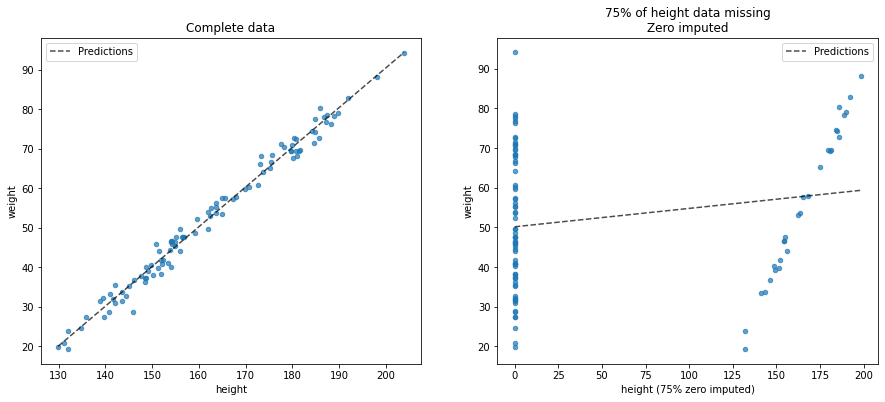

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

df.plot(
    kind='scatter', x='height',
    y='weight', ax=axs[0],
    alpha=0.7
)

df.plot(
    kind='scatter',
    x='height (75% zero imputed)',
    y='weight', ax=axs[1],
    alpha=0.7
)

df.sort_values('height').plot(
    kind='line', x='height', y='pred', title='Complete data',
    ax=axs[0], color='k', label='Predictions', alpha=0.7,
    linestyle='--'
)

df.sort_values('height (75% zero imputed)').plot(
    kind='line', x='height (75% zero imputed)', y='im_pred',
    title="75% of height data missing\nZero imputed",
    ax=axs[1], color='k', label='Predictions', alpha=0.7,
    linestyle='--'
)

fig.show()

In [21]:
# Setting missing values to the mean

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df['height (75% mean imputed)'] = imp.fit_transform(
    df[['height (with 75% NaN)']]
)[:,0]

In [22]:
reg3 = Ridge()
x3, y3 = df[['height (75% mean imputed)']], df['weight']
reg3.fit(x3, y3)

df['mean_pred'] = reg3.predict(x3)

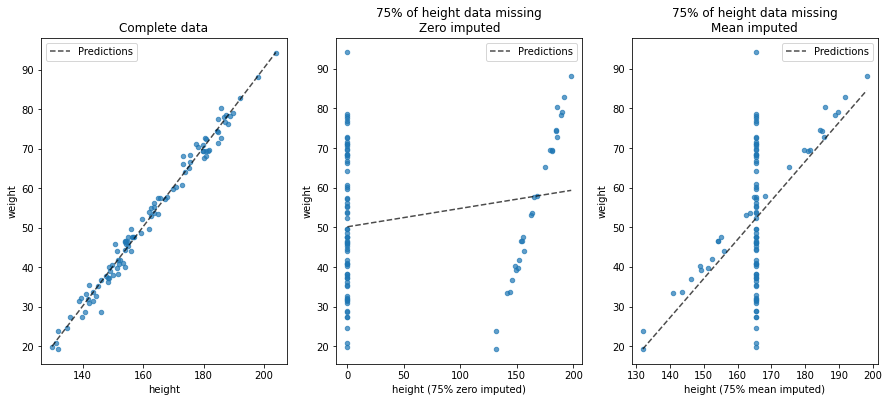

In [36]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6))
# complete data
df.plot(
    kind='scatter', x='height',
    y='weight', ax=axs[0],
    alpha=0.7
)
# zero imputed
df.plot(
    kind='scatter',
    x='height (75% zero imputed)',
    y='weight', ax=axs[1],
    alpha=0.7
)
# mean imputed
df.plot(
    kind='scatter',
    x='height (75% mean imputed)',
    y='weight', ax=axs[2],
    alpha=0.7
)
# complete prediction
df.sort_values('height').plot(
    kind='line', x='height', y='pred', title='Complete data',
    ax=axs[0], color='k', label='Predictions', alpha=0.7,
    linestyle='--'
)
# zero imputed prediction
df.sort_values('height (75% zero imputed)').plot(
    kind='line', x='height (75% zero imputed)', y='im_pred',
    title="75% of height data missing\nZero imputed",
    ax=axs[1], color='k', label='Predictions', alpha=0.7,
    linestyle='--'
)
# mean imputed prediction
df.sort_values('height (75% mean imputed)').plot(
    kind='line', x='height (75% mean imputed)', y='mean_pred',
    title="75% of height data missing\nMean imputed",
    ax=axs[2], color='k', label='Predictions', alpha=0.7,
    linestyle='--'
)
fig.show()

In [38]:
# Using informed estimation for missing values
# enable  module first since it is an experimental one
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(missing_values=np.nan)
df['height (75% iterative imputed)'] = imp.fit_transform(
    df[['height (with 75% NaN)', 'gender']]
)[:, 0]

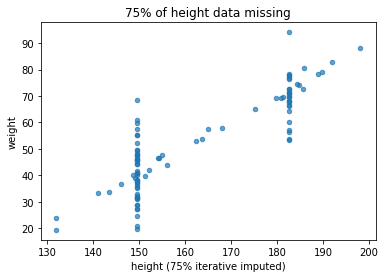

In [39]:
df.plot(
    kind='scatter',
    x='height (75% iterative imputed)',
    y='weight', alpha=0.7,
    title='75% of height data missing'
)

In [40]:
# Encoding non-numerical columns
df = pd.DataFrame({
    'Size': np.random.choice(['XS', 'S','M', 'L', 'XL', 'XXL'], 10),
    'Brand': np.random.choice(['Nike', 'Puma', 'Adidas', 'Le Coq', 'Reebok'], 10)
})

In [49]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.5)

In [44]:
!pip install category_encoders

     |████████████████████████████████| 82 kB 314 kB/s 


In [50]:
# One-hot encoding
from category_encoders.one_hot import OneHotEncoder
encoder = OneHotEncoder(use_cat_names=True, handle_unknown='return_nan')
x_train = encoder.fit_transform(df_train)
x_test = encoder.fit_transform(df_test)

In [57]:
x_train

,Size_S,Size_L,Size_M,Brand_Adidas,Brand_Puma,Brand_Nike,Brand_Reebok
9,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [58]:
x_test

,Size_XXL,Size_L,Size_S,Size_XS,Brand_Nike,Brand_Adidas,Brand_Puma,Brand_Le Coq
6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [56]:
x_test.isna().sum()

Size_XXL        0
Size_L          0
Size_S          0
Size_XS         0
Brand_Nike      0
Brand_Adidas    0
Brand_Puma      0
Brand_Le Coq    0
dtype: int64

In [ ]:
# ordinal encoding